In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Step-1 Data Creation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 
from torch.utils.data import TensorDataset, DataLoader

In [3]:
# Fix the random seed (so results are reproducible)
np.random.seed(42)

# Number of samples
n_samples = 5000

# Input features (advertising budgets)
tv_ads = np.random.randint(1000, 20000, n_samples)      # TV budget
radio_ads = np.random.randint(500, 10000, n_samples)    # Radio budget
online_ads = np.random.randint(1000, 15000, n_samples)  # Online budget

# Target (sales): linear combination of ads + noise
sales = 0.05 * tv_ads + 0.04 * radio_ads + 0.03 * online_ads + np.random.normal(0, 1000, n_samples)

# Create a DataFrame (like a small dataset table)
df = pd.DataFrame({
    "TV_Ads": tv_ads,
    "Radio_Ads": radio_ads,
    "Online_Ads": online_ads,
    "Sales": sales
})

print(df.head())  # Show first 5 rows


   TV_Ads  Radio_Ads  Online_Ads        Sales
0   16795       8956        7041  2819.100172
1    1860       9645       11470   856.463555
2    6390       5024        6063  -175.977287
3   12964       7059        9437  2626.884083
4   12284       8120       11350    73.025046


# Step-2 EDA

Shape of the dataset: (5000, 4)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TV_Ads      5000 non-null   int64  
 1   Radio_Ads   5000 non-null   int64  
 2   Online_Ads  5000 non-null   int64  
 3   Sales       5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB
None

 Summary Statistics
             TV_Ads    Radio_Ads    Online_Ads        Sales
count   5000.000000  5000.000000   5000.000000  5000.000000
mean   10486.155800  5207.444200   7922.948200   960.789146
std     5477.197546  2744.480026   4015.336831  1054.338067
min     1009.000000   501.000000   1004.000000 -3049.580085
25%     5780.000000  2870.750000   4482.000000   243.544343
50%    10578.000000  5156.000000   7921.500000   941.342908
75%    15113.000000  7560.000000  11295.000000  1684.232685
max    19994.000000  9999.000000  14999.000

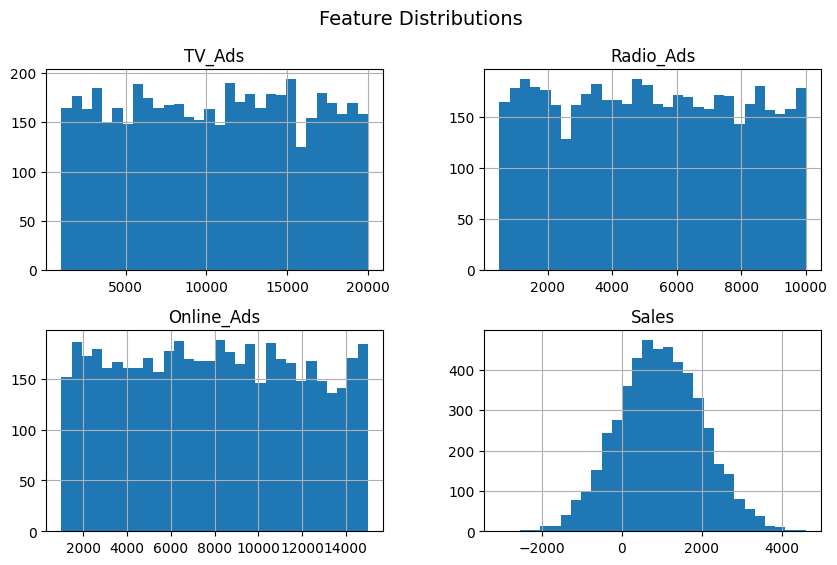

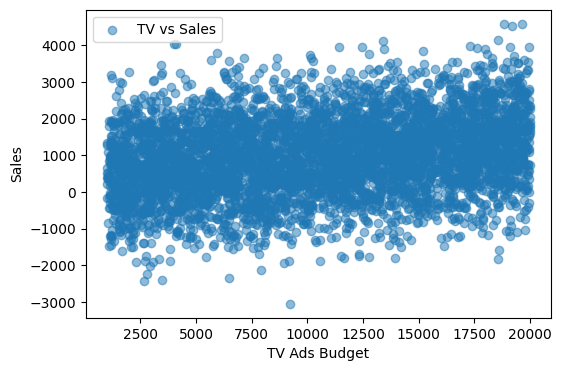

In [4]:
#  1. Shape 
print ("Shape of the dataset:", df.shape)

# 2. Info
print("\nDataset Info:")
print(df.info())


# 3. Statistical summary 
print("\n Summary Statistics")
print(df.describe())

# 4. Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# 5. Correlation matrix (to see relationships)
print("\nCorrelation Matrix:")
print(df.corr())

# 6. Visualization
import matplotlib.pyplot as plt

# Plot distributions of features
df.hist(figsize=(10, 6), bins=30)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Scatter plot: Ads vs Sales
plt.figure(figsize=(6, 4))
plt.scatter(df["TV_Ads"], df["Sales"], alpha=0.5, label="TV vs Sales")
plt.xlabel("TV Ads Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Step-3 preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Split features ( x ) and target ( y )
X = df[["TV_Ads", "Radio_Ads", "Online_Ads"]].values
y = df['Sales'].values.reshape(-1, 1)

In [7]:
# CORRECT ORDER for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (ONCE!)
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# Also scale y if you have a scaler for it
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

NameError: name 'scaler_x' is not defined

In [ ]:
# Check shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)

# Step-4 Convert tp pyTorch Tensors

In [ ]:

from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Convert numpy arrays to pytorch tensors

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)

In [ ]:

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

In [ ]:
# 2. Create TensorDataset ( pairs of input & target )
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
# 3. Create dataloader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle=False)

In [ ]:
# Check one batch
for X_batch , y_batch in train_loader:
    print("X_batch shape:", X_batch.shape)
    print("y_batch shape:", y_batch.shape)
    break

# step - 5 Build the model

In [ ]:
import torch.nn as nn

In [ ]:
# 1. Define the model

class SalesModel(nn.Module):
    def __inint__(self):
        super(SalesModel, self).__init__()
        # Single linear layer: 3 inputs ( Tv , Radio , Online ) -> Output ( Sales)
        self.linear = nn.Linear( 3 ,1)
        def forward(self, x):
            # forward pass: Input x -> Linear layer -> output
            return self.linear(x)

# 2. Create a instance of the model
model = SalesModel()

# 3. print model architecture
print(model)

# Step 6: Loss, Optimizer & Training# 

In [ ]:
import torch.optim as optim

# 1. Define Loss function ( Mean Squared Error for regression )
criterion = nn.MSELoss()

# 2. Define optimizer ( Adam optimizer, commonly used)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 3. Training Loop
num_epochs = 100 # number of passes over the full dataset

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # foraward pass: Compute predicions
        outputs = model(X_batch)

        # Compute loss
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradinets
        loss.backward()

        # update weights
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)

# Average loss for the epoch
epoch_loss = running_loss / len(train_loader.dataset)

 # Print loss every 10 epochs
if (epoch + 1) % 10 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

In [ ]:
import torch
import torch.nn as nn

# Define model
class SalesModel(nn.Module):
    def __init__(self):
        super(SalesModel, self).__init__()
        # Single linear layer: 3 inputs → 1 output
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate model
model = SalesModel()

# Check parameters
print("Model parameters:", list(model.parameters()))


In [ ]:
# Step 6: Training Loop

In [ ]:
import torch.optim as optim

# Now optimizer will work
optimizer = optim.Adam(model.parameters(), lr=0.01)
print("Optimizer created successfully!")


# Step 6: Training Loop

In [ ]:
num_epochs = 100  # how many times the model sees the full dataset

for epoch in range(num_epochs):
    model.train()  # set model to training mode
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        # 1. Zero the gradients from previous step
        optimizer.zero_grad()

        # 2. Forward pass: compute predicted sales
        outputs = model(X_batch)

        # 3. Compute loss (MSE)
        loss = criterion(outputs, y_batch)

        # 4. Backward pass: compute gradients
        loss.backward()

        # 5. Update weights
        optimizer.step()

        # Accumulate batch loss
        running_loss += loss.item() * X_batch.size(0)

    # Average loss for this epoch
    epoch_loss = running_loss / len(train_loader.dataset)

    # Print every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


# Step 7: Evaluate & Visualize Predictions.

In [ ]:
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    # Make predictions on test set
    y_pred_tensor = model(X_test_tensor)
    
# Convert predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy())
y_true = scaler_y.inverse_transform(y_test_tensor.numpy())

# Compute Mean Squared Error on test data
mse = ((y_pred - y_true) ** 2).mean()
print(f"Test MSE: {mse:.2f}")

# Plot predicted vs actual sales
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # diagonal line
plt.show()


# Save/Load

In [ ]:
torch.save(model.state_dict(), "sales_model.pth")


In [ ]:
model = SalesModel()
model.load_state_dict(torch.load("sales_model.pth"))
model.eval()
